In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [37]:
overdoses = pd.read_excel('./overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [38]:
%matplotlib inline
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

In [39]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

Text(0.5, 1.0, 'Heroin Overdoses per Year')

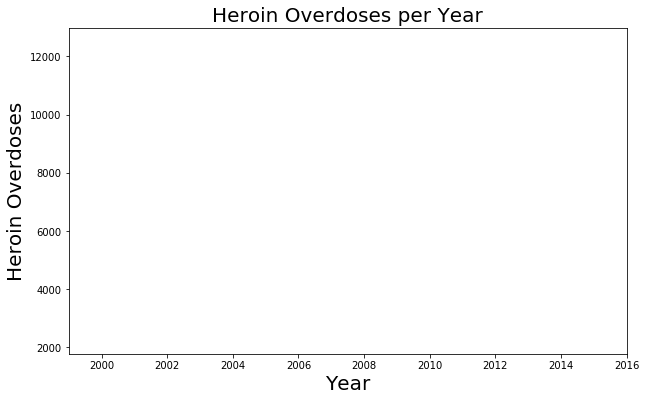

In [45]:
fig = plt.figure(figsize=(10,6))



plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

In [68]:
def animate(i, plt):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

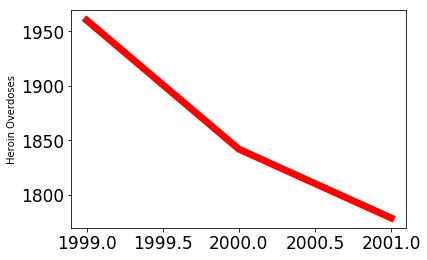

In [70]:
animate(2, plt)

In [43]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

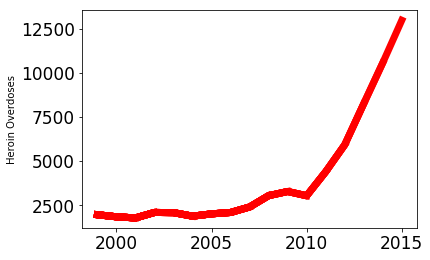

In [44]:
ani.save('HeroinOverdosesJumpy.mp4')

## Using Celuloid

In [71]:
from celluloid import Camera

%matplotlib inline
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

Text(0.5, 1.0, 'Heroin Overdoses per Year')

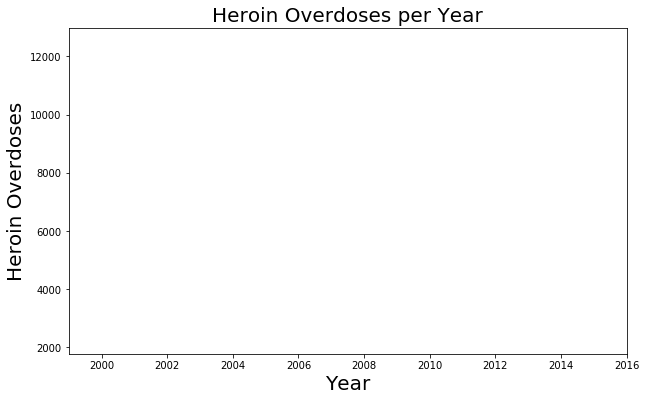

In [72]:
fig = plt.figure(figsize=(10,6))
camera = Camera(fig)

plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

[]

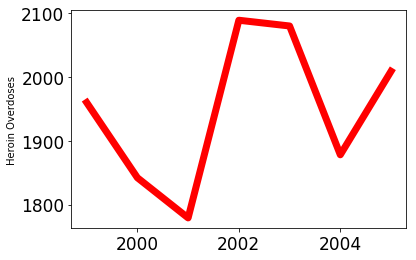

In [76]:
animate(6, plt)
camera.snap()

In [78]:
# Set up formatting for the movie files
Writer = ani.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

AttributeError: 'FuncAnimation' object has no attribute 'writers'

In [77]:
anim = camera.animate(interval=500, repeat_delay=3000, blit=True)
anim.save('textmovie.mp4', writer=writer)

## Example Test

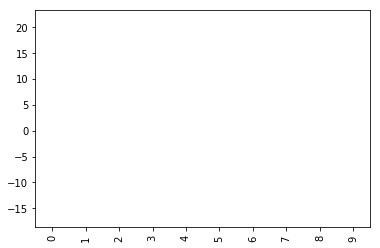

In [91]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np
import pandas as pd
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig) #  https://pypi.org/project/celluloid/
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2, rowspan=2)
for i in range(10):
    data = np.random.normal(0, 10, i+1)
    pd.DataFrame(data).plot(kind='bar', ax=ax1)
    camera.snap()

# Set up formatting for the movie files
Writer = ani.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

# anim = ani.ArtistAnimation(fig, ims, interval=500, repeat_delay=3000, blit=True)
anim = camera.animate(interval=50000, repeat_delay=5000)
anim.save('textmovie.mp4', writer=writer)